# Transient ERF

In [ ]:
# From the RFMIP paper:
# "Transient ERFs will be computed by differencing top-of-atmosphere energy diagnostics
# from three ensemble members employing time varying forcing-agent changes with the energy budget diagnostics
# from the 30-year control simulation. These integrations will
# use the same prescribed preindustrial climatology of SST
# and sea ice as in the time-slice ERF experiments. "

# check the paper for more info


In [ ]:
# From Forster et al. (2016):
# "Conceptually, the ERF that is most representative of a model's response would come from applying the time-varying SSTs
# and sea ice from the equivalently forced coupled model run in the ERF calculation. 
# This is the ERF_trans method proposed by AerChemMIP [Collins et al., 2016]."

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

In [21]:
# print out models and members where I have piClim-histall and piClim-control data:
experiments = {}
directory = '../Processed_data/Global_annual_means/'
model_names = [ f.name for f in os.scandir(directory) if f.is_dir() and f.name !='.ipynb_checkpoints']

for model in model_names:
    experiments[model] = {}
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    for exp in modelexp_names:
        if exp in ['piClim-control', 'piClim-histall']:
            experiments[model][exp] = {}
            modelexpdirectory = os.path.join(modeldirectory, exp)
            filenames = [f.name for f in os.scandir(modelexpdirectory) if f.name !='.ipynb_checkpoints']

            members = [file.rsplit('_')[2] for file in filenames]
            members.sort()
            experiments[model][exp] = members
    if bool(experiments[model]) == False: # delete element if empty
        del experiments[model]
        
experiments


{'NorESM2-LM': {'piClim-control': ['r1i1p1f1'],
  'piClim-histall': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1']},
 'ACCESS-ESM1-5': {'piClim-control': ['r1i1p1f1']},
 'HadGEM3-GC31-LL': {'piClim-control': ['r1i1p1f3'],
  'piClim-histall': ['r1i1p1f3', 'r2i1p1f3', 'r3i1p1f3']},
 'CESM2': {'piClim-control': ['r1i1p1f1']},
 'CESM2-WACCM': {'piClim-control': ['r1i2p1f1']},
 'MPI-ESM1-2-LR': {'piClim-control': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1']},
 'GISS-E2-1-G': {'piClim-control': ['r1i1p1f1', 'r1i1p1f2', 'r1i1p3f1'],
  'piClim-histall': ['r1i1p1f1', 'r1i1p1f2', 'r1i1p3f2']},
 'CNRM-CM6-1': {'piClim-control': ['r1i1p1f2'],
  'piClim-histall': ['r1i1p1f2']},
 'MRI-ESM2-0': {'piClim-control': ['r1i1p1f1']},
 'EC-Earth3': {'piClim-control': ['r1i1p1f1']},
 'IPSL-CM6A-LR': {'piClim-control': ['r1i1p1f1',
   'r2i1p1f1',
   'r3i1p1f1',
   'r4i1p1f1',
   'r5i1p1f1'],
  'piClim-histall': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1']},
 'ACCESS-CM2': {'piClim-control': ['r1i1p1f1']},
 'MIROC6': {'piClim-control':

In [24]:
# choose model and load data

model = 'IPSL-CM6A-LR'; member = 'r1i1p1f1'

# load files:
piclimcontrol_path = '../Processed_data/Global_annual_means/' + model + '/piClim-control/'
histall_path = '../Processed_data/Global_annual_means/' + model + '/piClim-histall/'
histcoupled_path = '../Processed_data/Global_annual_means/' + model + '/historical/'

histall_filename = model + '_piClim-histall_' + member + '_means.txt'
exp_data = pd.read_table(histall_path + histall_filename, index_col=0, sep = ',')

histcoupled_filename = model + '_historical_' + member + '_means.txt'
historical_data = pd.read_table(histcoupled_path + histcoupled_filename, index_col=0, sep = ',')

piclim_control_filename = model + '_piClim-control_' + member + '_means.txt'
control_data = pd.read_table(piclimcontrol_path + piclim_control_filename, index_col=0, sep = ',')


In [25]:
hist_tas = exp_data['tas']
histcoupled_tas = historical_data['tas']
control_tas = control_data['tas']

histN = exp_data['rsdt'] - exp_data['rsut'] - exp_data['rlut']
histcoupledN = historical_data['rsdt'] - historical_data['rsut'] - historical_data['rlut']
controlN = control_data['rsdt'] - control_data['rsut'] - control_data['rlut']

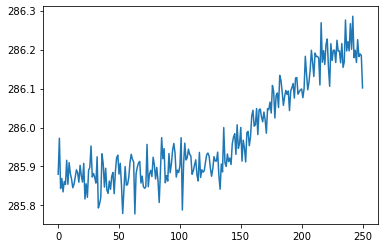

In [29]:
hist_tas.plot()

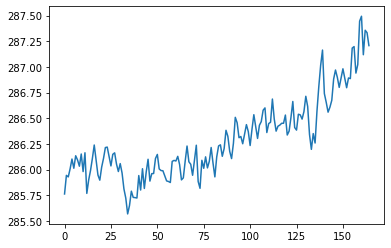

In [27]:
histcoupled_tas.plot()

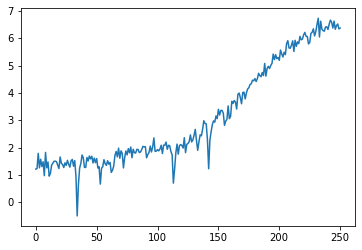

In [18]:
histN.plot()

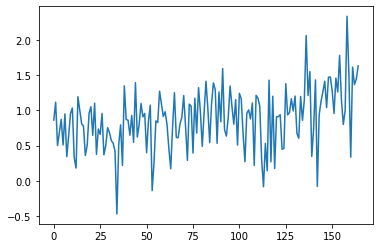

In [30]:
histcoupledN.plot()

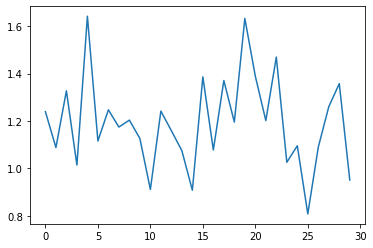

In [19]:
controlN.plot()